# Soal No.1

In [5]:
import pandas as pd
import mysql.connector as mysql

In [6]:
koneksi = mysql.connect(host="localhost", database="karyawan", user="root", password="")

In [7]:
cursor = koneksi.cursor()
cursor.execute("CREATE TABLE IF NOT EXISTS productlines(productLine varchar(50) NOT NULL,"
               "textDescription varchar(4000) DEFAULT NULL,htmlDescription mediumtext,image mediumblob,"
               "PRIMARY KEY (`productLine`))ENGINE=InnoDB DEFAULT CHARSET=latin1;")

In [8]:
cursor = koneksi.cursor()
cursor.execute("CREATE TABLE IF NOT EXISTS products(productCode varchar(15) NOT NULL, productName varchar(70) NOT NULL,"+
               "productLine varchar(50) NOT NULL, productScale varchar(10) NOT NULL, productVendor varchar(50) NOT NULL,"+
               "productDescription text NOT NULL, quantityInStock smallint NOT NULL, buyPrice decimal(10,2) NOT NULL,"+
               "MSRP decimal(10,2) NOT NULL,PRIMARY KEY (`productCode`), KEY productLine (`productLine`),"+
               "CONSTRAINT `products_ibfk_1` FOREIGN KEY (`productLine`) REFERENCES `productlines` (`productLine`))"+
               "ENGINE=InnoDB DEFAULT CHARSET=latin1;")

In [9]:
cursor = koneksi.cursor()
cursor.execute("CREATE TABLE IF NOT EXISTS offices(officeCode varchar(10) NOT NULL,city varchar(50) NOT NULL,"
               "phone varchar(50) NOT NULL,addressLine1 varchar(50) NOT NULL,addressLine2 varchar(50) DEFAULT NULL,"
               "state varchar(50) DEFAULT NULL,country varchar(50) NOT NULL,postalCode varchar(15) NOT NULL,"
               "territory varchar(10) NOT NULL,PRIMARY KEY (`officeCode`)) ENGINE=InnoDB DEFAULT CHARSET=latin1;")

In [6]:
cursor = koneksi.cursor()
cursor.execute("CREATE TABLE IF NOT EXISTS employees(employeeNumber int NOT NULL,lastName varchar(50) NOT NULL,"
               "firstName varchar(50) NOT NULL,extension varchar(10) NOT NULL,email varchar(100) NOT NULL,"
               "officeCode varchar(10) NOT NULL,reportsTo int DEFAULT NULL,jobTitle varchar(50) NOT NULL,"
               "PRIMARY KEY (`employeeNumber`),KEY `reportsTo` (`reportsTo`),KEY `officeCode` (`officeCode`),"
               "CONSTRAINT `employees_ibfk_1` FOREIGN KEY (`reportsTo`) REFERENCES `employees` (`employeeNumber`),"
               "CONSTRAINT `employees_ibfk_2` FOREIGN KEY (`officeCode`) REFERENCES `offices` (`officeCode`))"
               " ENGINE=InnoDB DEFAULT CHARSET=latin1;")

In [10]:
cursor = koneksi.cursor()
cursor.execute("CREATE TABLE IF NOT EXISTS customers(customerNumber int NOT NULL,customerName varchar(50) NOT NULL,"
               "contactLastName varchar(50) NOT NULL,contactFirstName varchar(50) NOT NULL,"
               "phone varchar(50) NOT NULL,addressLine1 varchar(50) NOT NULL,addressLine2 varchar(50) DEFAULT NULL,"
               "city varchar(50) NOT NULL,state varchar(50) DEFAULT NULL,postalCode varchar(15) DEFAULT NULL,"
               "country varchar(50) NOT NULL,salesRepEmployeeNumber int DEFAULT NULL,creditLimit decimal(10,2) DEFAULT NULL,"
               "PRIMARY KEY (`customerNumber`),KEY `salesRepEmployeeNumber` (`salesRepEmployeeNumber`),"
               "CONSTRAINT `customers_ibfk_1` FOREIGN KEY (`salesRepEmployeeNumber`)"
               " REFERENCES `employees` (`employeeNumber`)) ENGINE=InnoDB DEFAULT CHARSET=latin1;")

In [11]:
cursor = koneksi.cursor()
cursor.execute("CREATE TABLE IF NOT EXISTS payments(customerNumber int NOT NULL,checkNumber varchar(50) NOT NULL,"
               "paymentDate date NOT NULL,amount decimal(10,2) NOT NULL,PRIMARY KEY (`customerNumber`,`checkNumber`),"
               "CONSTRAINT `payments_ibfk_1` FOREIGN KEY (`customerNumber`) REFERENCES `customers` (`customerNumber`))"
               " ENGINE=InnoDB DEFAULT CHARSET=latin1;")

In [12]:
cursor = koneksi.cursor()
cursor.execute("CREATE TABLE IF NOT EXISTS orders(orderNumber int NOT NULL,orderDate date NOT NULL,"
               "requiredDate date NOT NULL,shippedDate date DEFAULT NULL,status varchar(15) NOT NULL,comments text,"
               "customerNumber int NOT NULL,PRIMARY KEY (`orderNumber`),KEY `customerNumber` (`customerNumber`),"
               "CONSTRAINT `orders_ibfk_1` FOREIGN KEY (`customerNumber`) REFERENCES `customers` (`customerNumber`))"
               " ENGINE=InnoDB DEFAULT CHARSET=latin1;")

In [13]:
cursor = koneksi.cursor()
cursor.execute("CREATE TABLE IF NOT EXISTS orderdetails(orderNumber int NOT NULL, productCode varchar(15) NOT NULL,"+
               "quantityOrdered int NOT NULL, priceEach decimal(10,2) NOT NULL, orderLineNumber smallint NOT NULL,"+
               "PRIMARY KEY (`orderNumber`,`productCode`), KEY productCode (`productCode`),"+
               "CONSTRAINT `orderdetails_ibfk_1` FOREIGN KEY (`orderNumber`) REFERENCES `orders` (`orderNumber`),"+
               "CONSTRAINT `orderdetails_ibfk_2` FOREIGN KEY (`productCode`) REFERENCES `products` (`productCode`))"+
               "ENGINE=InnoDB DEFAULT CHARSET=latin1;")

# Soal No.2

In [14]:
cursor = koneksi.cursor()
cursor.execute("describe offices;")
office = cursor.fetchall()
office

[('officeCode', 'varchar(10)', 'NO', 'PRI', None, ''),
 ('city', 'varchar(50)', 'NO', '', None, ''),
 ('phone', 'varchar(50)', 'NO', '', None, ''),
 ('addressLine1', 'varchar(50)', 'NO', '', None, ''),
 ('addressLine2', 'varchar(50)', 'YES', '', None, ''),
 ('state', 'varchar(50)', 'YES', '', None, ''),
 ('country', 'varchar(50)', 'NO', '', None, ''),
 ('postalCode', 'varchar(15)', 'NO', '', None, ''),
 ('territory', 'varchar(10)', 'NO', '', None, '')]

In [15]:
cursor = koneksi.cursor()
cursor.execute("select * from offices")
office = cursor.fetchall()
office

[('1',
  'San Francisco',
  '+1 650 219 4782',
  '100 Market Street',
  'Suite 300',
  'CA',
  'USA',
  '94080',
  'NA'),
 ('2',
  'Boston',
  '+1 215 837 0825',
  '1550 Court Place',
  'Suite 102',
  'MA',
  'USA',
  '02107',
  'NA'),
 ('3',
  'NYC',
  '+1 212 555 3000',
  '523 East 53rd Street',
  'apt. 5A',
  'NY',
  'USA',
  '10022',
  'NA'),
 ('4',
  'Paris',
  '+33 14 723 4404',
  "43 Rue Jouffroy D'abbans",
  None,
  None,
  'France',
  '75017',
  'EMEA'),
 ('5',
  'Tokyo',
  '+81 33 224 5000',
  '4-1 Kioicho',
  None,
  'Chiyoda-Ku',
  'Japan',
  '102-8578',
  'Japan'),
 ('6',
  'Sydney',
  '+61 2 9264 2451',
  '5-11 Wentworth Avenue',
  'Floor #2',
  None,
  'Australia',
  'NSW 2010',
  'APAC'),
 ('7',
  'London',
  '+44 20 7877 2041',
  '25 Old Broad Street',
  'Level 7',
  None,
  'UK',
  'EC2N 1HN',
  'EMEA')]

In [16]:
cursor = koneksi.cursor()
sql = "INSERT INTO offices VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s);"
data = (8,'Indonesia',+62, 'indonesia','jakarta','IND', 'IND',1221,119)
cursor.execute(sql,data)
koneksi.commit()

In [21]:
cursor = koneksi.cursor()
cursor.execute("select * from offices")
office = cursor.fetchall()
office

[('1',
  'San Francisco',
  '+1 650 219 4782',
  '100 Market Street',
  'Suite 300',
  'CA',
  'USA',
  '94080',
  'NA'),
 ('2',
  'Boston',
  '+1 215 837 0825',
  '1550 Court Place',
  'Suite 102',
  'MA',
  'USA',
  '02107',
  'NA'),
 ('3',
  'NYC',
  '+1 212 555 3000',
  '523 East 53rd Street',
  'apt. 5A',
  'NY',
  'USA',
  '10022',
  'NA'),
 ('4',
  'Paris',
  '+33 14 723 4404',
  "43 Rue Jouffroy D'abbans",
  None,
  None,
  'France',
  '75017',
  'EMEA'),
 ('5',
  'Tokyo',
  '+81 33 224 5000',
  '4-1 Kioicho',
  None,
  'Chiyoda-Ku',
  'Japan',
  '102-8578',
  'Japan'),
 ('6',
  'Sydney',
  '+61 2 9264 2451',
  '5-11 Wentworth Avenue',
  'Floor #2',
  None,
  'Australia',
  'NSW 2010',
  'APAC'),
 ('7',
  'London',
  '+44 20 7877 2041',
  '25 Old Broad Street',
  'Level 7',
  None,
  'UK',
  'EC2N 1HN',
  'EMEA')]

In [18]:
cursor = koneksi.cursor()
sql = "UPDATE offices SET country = %s, postalCode = %s WHERE city = %s;"
data = ('Indonesia', '1111', 'Indonesia')
cursor.execute(sql,data)
koneksi.commit()

In [20]:
cursor = koneksi.cursor()
cursor.execute("DELETE from offices WHERE officeCode = '8'")
koneksi.commit()

# Soal No.3

In [22]:
data_off = pd.DataFrame(columns=["officeCode", "city", "phone", "addressLine1", "addressLine2", 
                                 "state", "country", "postalCode", "territory"], data=office)
data_off = data_off.set_index("officeCode")
data_off.head(4)

,city,phone,addressLine1,addressLine2,state,country,postalCode,territory
officeCode,,,,,,,,
1,San Francisco,+1 650 219 4782,100 Market Street,Suite 300,CA,USA,94080,NA
2,Boston,+1 215 837 0825,1550 Court Place,Suite 102,MA,USA,02107,NA
3,NYC,+1 212 555 3000,523 East 53rd Street,apt. 5A,NY,USA,10022,NA
4,Paris,+33 14 723 4404,43 Rue Jouffroy D'abbans,None,None,France,75017,EMEA


# Soal No.4

In [23]:
data_off.shape

(7, 8)

In [24]:
data_off.describe()

,city,phone,addressLine1,addressLine2,state,country,postalCode,territory
count,7,7,7,5,4,7,7,7
unique,7,7,7,5,4,5,7,4
top,Sydney,+1 650 219 4782,523 East 53rd Street,Level 7,NY,USA,102-8578,NA
freq,1,1,1,1,1,3,1,3


In [25]:
#membersihkan data
import numpy as np
data_off.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, 1 to 7
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   city          7 non-null      object
 1   phone         7 non-null      object
 2   addressLine1  7 non-null      object
 3   addressLine2  5 non-null      object
 4   state         4 non-null      object
 5   country       7 non-null      object
 6   postalCode    7 non-null      object
 7   territory     7 non-null      object
dtypes: object(8)
memory usage: 504.0+ bytes


In [26]:
#normalisasi nilai
np.sum(data_off.isnull())

city            0
phone           0
addressLine1    0
addressLine2    2
state           3
country         0
postalCode      0
territory       0
dtype: int64

In [27]:
from sklearn.impute import SimpleImputer
from scipy.stats import mode

In [28]:
data_off['addressLine2'].mode()

0     Floor #2
1      Level 7
2    Suite 102
3    Suite 300
4      apt. 5A
dtype: object

In [29]:
data_off['state'].mode()

0            CA
1    Chiyoda-Ku
2            MA
3            NY
dtype: object

In [30]:
data_off['addressLine2'] = data_off['addressLine2'].fillna(data_off['addressLine2'].mode()[0])
data_off['state'] = data_off['state'].fillna(data_off['state'].mode()[0])

In [31]:
data_off.isnull().sum()

city            0
phone           0
addressLine1    0
addressLine2    0
state           0
country         0
postalCode      0
territory       0
dtype: int64

In [32]:
#Mendeteksi Outlier
from scipy import stats

hasil = np.abs(stats.zscore(data_off._get_numeric_data()))
print(hasil)

[]


In [33]:
hasil.shape

(7, 0)

In [34]:
outlier = data_off[(hasil<3).all(axis=1)]
print(outlier.shape)

(7, 8)


In [35]:
outlier

,city,phone,addressLine1,addressLine2,state,country,postalCode,territory
officeCode,,,,,,,,
1,San Francisco,+1 650 219 4782,100 Market Street,Suite 300,CA,USA,94080,NA
2,Boston,+1 215 837 0825,1550 Court Place,Suite 102,MA,USA,02107,NA
3,NYC,+1 212 555 3000,523 East 53rd Street,apt. 5A,NY,USA,10022,NA
4,Paris,+33 14 723 4404,43 Rue Jouffroy D'abbans,Floor #2,CA,France,75017,EMEA
5,Tokyo,+81 33 224 5000,4-1 Kioicho,Floor #2,Chiyoda-Ku,Japan,102-8578,Japan
6,Sydney,+61 2 9264 2451,5-11 Wentworth Avenue,Floor #2,CA,Australia,NSW 2010,APAC
7,London,+44 20 7877 2041,25 Old Broad Street,Level 7,CA,UK,EC2N 1HN,EMEA


In [36]:
#Transformasi(encoding, scalling, binning)
from sklearn import preprocessing
kategori = ["city", "productCode","phone","postalCode"]
le = preprocessing.LabelEncoder()

In [54]:
#binning
data_off.describe()

,city,phone,postalCode
count,7.000000,7.000000,7.000000
mean,3.000000,3.000000,3.000000
std,2.160247,2.160247,2.160247
min,0.000000,0.000000,0.000000
25%,1.500000,1.500000,1.500000
50%,3.000000,3.000000,3.000000
75%,4.500000,4.500000,4.500000
max,6.000000,6.000000,6.000000


In [55]:
pd.qcut(data_off['city'], q=4).value_counts()

(4.5, 6.0]       2
(1.5, 3.0]       2
(-0.001, 1.5]    2
(3.0, 4.5]       1
Name: city, dtype: int64

In [56]:
data_off['city']

officeCode
1    4
2    0
3    2
4    3
5    6
6    5
7    1
Name: city, dtype: int32

In [57]:
data_off['city'].dtype

dtype('int32')

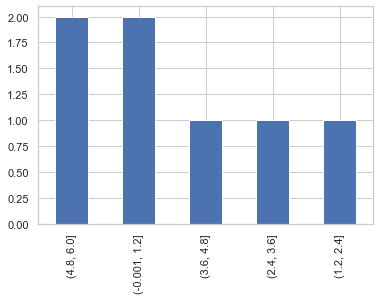

In [58]:
pd.qcut(data_off['city'], q=5).value_counts().plot(kind='bar')

In [59]:
label = ['sedikit','banyak','agak banyak','biasa','tidak sedikit']
label_city = pd.qcut(data_off['city'], q = [0, 0.2, 0.4, 0.6, 0.8, 1], labels = label)
label_city

officeCode
1            biasa
2          sedikit
3           banyak
4      agak banyak
5    tidak sedikit
6    tidak sedikit
7          sedikit
Name: city, dtype: category
Categories (5, object): ['sedikit' < 'banyak' < 'agak banyak' < 'biasa' < 'tidak sedikit']

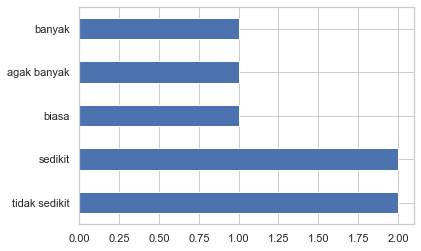

In [60]:
label_city.value_counts().plot(kind='barh')

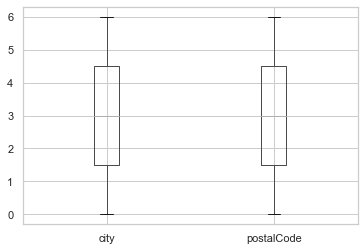

In [61]:
#scalling
data_off.boxplot(['city', 'postalCode'])

In [63]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [64]:
scaler.fit(data_off[['city']])
data_off['city_Scalled'] = scaler.transform(data_off[['city']])

data_off['city_Scalled'].describe()

count    7.000000
mean     0.500000
std      0.360041
min      0.000000
25%      0.250000
50%      0.500000
75%      0.750000
max      1.000000
Name: city_Scalled, dtype: float64

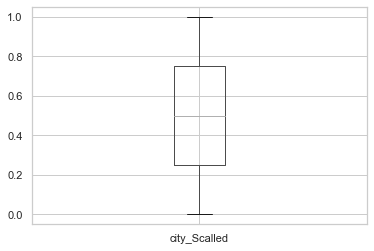

In [65]:
data_off.boxplot(['city_Scalled'])

In [66]:
#feature selection/extraction
for feature in kategori:
    if feature in data_off.columns.values:
        data_off[feature] = le.fit_transform(data_off[feature])
        
data_off.head()

,city,phone,addressLine1,addressLine2,state,country,postalCode,territory,city_Scalled
officeCode,,,,,,,,,
1,4,2,100 Market Street,Suite 300,CA,USA,4,NA,0.666667
2,0,1,1550 Court Place,Suite 102,MA,USA,0,NA,0.000000
3,2,0,523 East 53rd Street,apt. 5A,NY,USA,1,NA,0.333333
4,3,3,43 Rue Jouffroy D'abbans,Floor #2,CA,France,3,EMEA,0.500000
5,6,6,4-1 Kioicho,Floor #2,Chiyoda-Ku,Japan,2,Japan,1.000000


In [67]:
data_off.dtypes

city              int64
phone             int64
addressLine1     object
addressLine2     object
state            object
country          object
postalCode        int64
territory        object
city_Scalled    float64
dtype: object

In [72]:
#feature selection
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [68]:
bmsx = np.array([data_off['city'], data_off['phone'], data_off['postalCode']])
bmsx.shape

(3, 7)

In [69]:
bmsx

array([[4, 0, 2, 3, 6, 5, 1],
       [2, 1, 0, 3, 6, 5, 4],
       [4, 0, 1, 3, 2, 6, 5]], dtype=int64)

In [70]:
bmsxt = bmsx.transpose()
bmsxt

array([[4, 2, 4],
       [0, 1, 0],
       [2, 0, 1],
       [3, 3, 3],
       [6, 6, 2],
       [5, 5, 6],
       [1, 4, 5]], dtype=int64)

In [73]:
bms_std = StandardScaler().fit_transform(bmsxt)
bms_std

array([[ 0.5, -0.5,  0.5],
       [-1.5, -1. , -1.5],
       [-0.5, -1.5, -1. ],
       [ 0. ,  0. ,  0. ],
       [ 1.5,  1.5, -0.5],
       [ 1. ,  1. ,  1.5],
       [-1. ,  0.5,  1. ]])

In [74]:
pcafs = PCA(n_components=0.70, whiten=True)
bmsfs_pca = pcafs.fit_transform(bms_std)

In [75]:
print('Original number of feat ures: ', bms_std.shape[1])
print('Reduced number of features: ', bmsfs_pca.shape[1])

Original number of feat ures:  3
Reduced number of features:  1


In [77]:
datafs_pca = pd.DataFrame(bmsfs_pca, columns = ["PC1"])
datafs_pca

,PC1
0,-0.151760
1,1.454660
2,1.119926
3,0.000000
4,-0.979890
5,-1.271686
6,-0.171251


In [79]:
#feature extraction
from sklearn import decomposition

In [80]:
pcafe=decomposition.PCA(n_components=3)
bmsfe_pca=pcafe.fit_transform(bms_std)

In [81]:
print('Original number of feat ures: ', bms_std.shape[1])
print('Reduced number of features: ', bmsfe_pca.shape[1])

Original number of feat ures:  3
Reduced number of features:  3


In [82]:
datafe_pca = pd.DataFrame(bmsfe_pca, columns = ["PC1", "PC2", "PC3"])
datafe_pca

,PC1,PC2,PC3
0,-0.237733,-0.156182,0.817979
1,2.278735,0.169324,-0.527916
2,1.754372,0.312664,0.569580
3,0.000000,0.000000,-0.000000
4,-1.535004,1.473960,-0.470323
5,-1.992105,-0.468847,0.248400
6,-0.268265,-1.330920,-0.637720


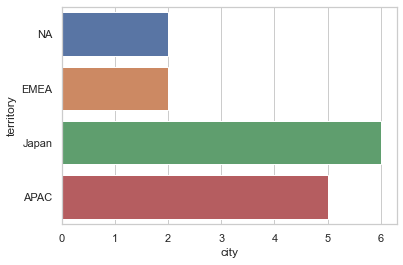

In [83]:
#visualisasi data
import seaborn as sns
sns.set(style="whitegrid")
sns.barplot(x="city", y="territory", data=data_off, ci=None)

# Soal No.5

In [84]:
cursor = koneksi.cursor()
cursor.execute("CREATE TABLE IF NOT EXISTS data_br(officeCode INT(10) NOT NULL,city INT(50) NOT NULL,"
               "phone INT(50) NOT NULL,addressLine1 varchar(50) NOT NULL,addressLine2 varchar(50) DEFAULT NULL,"
               "state varchar(50) DEFAULT NULL,country varchar(50) NOT NULL,postalCode INT(15) NOT NULL,"
               "territory varchar(10) NOT NULL,PRIMARY KEY (`officeCode`)) ENGINE=InnoDB DEFAULT CHARSET=latin1;")

In [85]:
cursor = koneksi.cursor()
cursor.execute("DELETE from data_br")
koneksi.commit()

In [86]:
cursor = koneksi.cursor()
for baris in office:
    sql = "INSERT INTO karyawan.data_br VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s);"
    cursor.execute(sql,baris)
    print(tuple(baris), "success")
    koneksi.commit()

('1', 'San Francisco', '+1 650 219 4782', '100 Market Street', 'Suite 300', 'CA', 'USA', '94080', 'NA') success
('2', 'Boston', '+1 215 837 0825', '1550 Court Place', 'Suite 102', 'MA', 'USA', '02107', 'NA') success
('3', 'NYC', '+1 212 555 3000', '523 East 53rd Street', 'apt. 5A', 'NY', 'USA', '10022', 'NA') success
('4', 'Paris', '+33 14 723 4404', "43 Rue Jouffroy D'abbans", None, None, 'France', '75017', 'EMEA') success
('5', 'Tokyo', '+81 33 224 5000', '4-1 Kioicho', None, 'Chiyoda-Ku', 'Japan', '102-8578', 'Japan') success
('6', 'Sydney', '+61 2 9264 2451', '5-11 Wentworth Avenue', 'Floor #2', None, 'Australia', 'NSW 2010', 'APAC') success
('7', 'London', '+44 20 7877 2041', '25 Old Broad Street', 'Level 7', None, 'UK', 'EC2N 1HN', 'EMEA') success


# Soal No.6

In [87]:
from pandas import DataFrame, read_csv

In [88]:
data_off.to_csv("data_hasil.csv", index=False)

In [89]:
data_expor = read_csv("data_hasil.csv")
data_expor

,city,phone,addressLine1,addressLine2,state,country,postalCode,territory,city_Scalled
0,4,2,100 Market Street,Suite 300,CA,USA,4,NaN,0.666667
1,0,1,1550 Court Place,Suite 102,MA,USA,0,NaN,0.000000
2,2,0,523 East 53rd Street,apt. 5A,NY,USA,1,NaN,0.333333
3,3,3,43 Rue Jouffroy D'abbans,Floor #2,CA,France,3,EMEA,0.500000
4,6,6,4-1 Kioicho,Floor #2,Chiyoda-Ku,Japan,2,Japan,1.000000
5,5,5,5-11 Wentworth Avenue,Floor #2,CA,Australia,6,APAC,0.833333
6,1,4,25 Old Broad Street,Level 7,CA,UK,5,EMEA,0.166667


In [ ]:
#sketchware